# Postprocessing
This notebook shall evaluate the performance of the trained model in terms of accuracy and false discovery rate.
To do this, we will plot the accuracy over the training process and a ROC curve to evaluate precision and recall.

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

## Load the information from previous training

In [4]:
date_string = '2016_08_16_07_13_38'
with open('training/' + date_string + '/accuracies.pkl', 'r') as f:
    test_acc, train_acc, test_ce = pickle.load(f)

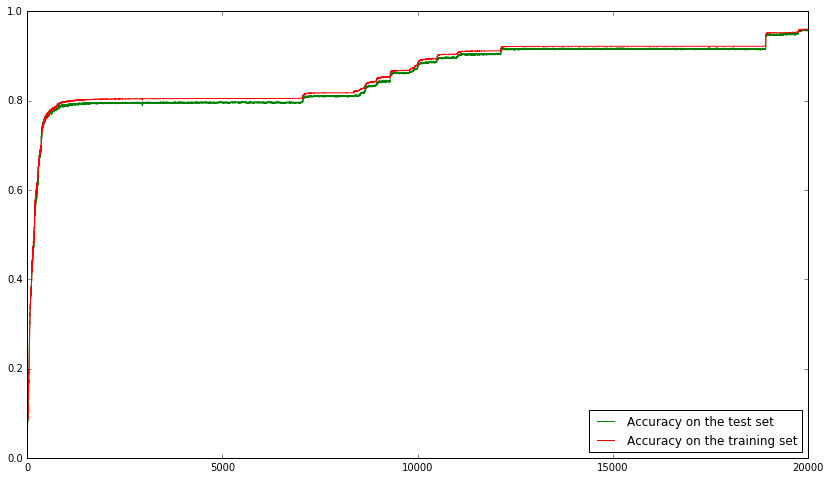

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(14,8))
plt.plot(test_acc, color='green', label='Accuracy on the test set')
plt.plot(train_acc, color='red', label='Accuracy on the training set')
plt.legend(loc="lower right")

In [7]:
print "Final Accuracy on Test Set: " + str(test_acc[-1])
print "Final Accuracy on Training Set: " + str(train_acc[-1])

Final Accuracy on Test Set: 0.957216493478
Final Accuracy on Training Set: 0.959999993062


## Plot ROC curve

In [9]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

# load test set
with open('test_data_gray_norm_aug.pkl', 'rb') as test_handle:
    test_set, test_labels = pickle.load(test_handle)

import tensorflow as tf
saver = tf.train.Saver()
path_to_model = 'training/' + date_string + '/model.ckpt'
with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state(path_to_model)
    if ckpt and ckpt.model_checkpoint_path:
      # Restores from checkpoint
      saver.restore(sess, path_to_model)
      print "Model loaded"
    else:
      print "No checkpoint file found"

ValueError: No variables to save